In [1]:
!pip install pandas matplotlib seaborn


In [12]:
import pandas as pd
data = pd.read_csv("country_wise_latest.csv")  
data


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [3]:
# Looking at the first few rows
print(data.head())

# Getting info on data types and missing values
print(data.info())

# Looking at column names
print(data.columns)


  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

In [4]:
# Checking for missing values
print(data.isnull().sum())



Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


In [5]:
# Dropping rows with missing values
data = data.dropna()

In [9]:
print(data.columns)


Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')


                       Confirmed  Deaths  Recovered
WHO Region                                         
Africa                    723207   12223     440645
Americas                 8839286  342732    4468616
Eastern Mediterranean    1490744   38339    1201400
Europe                   3299523  211144    1993723
South-East Asia          1835297   41349    1156933
Western Pacific           292428    8249     206770


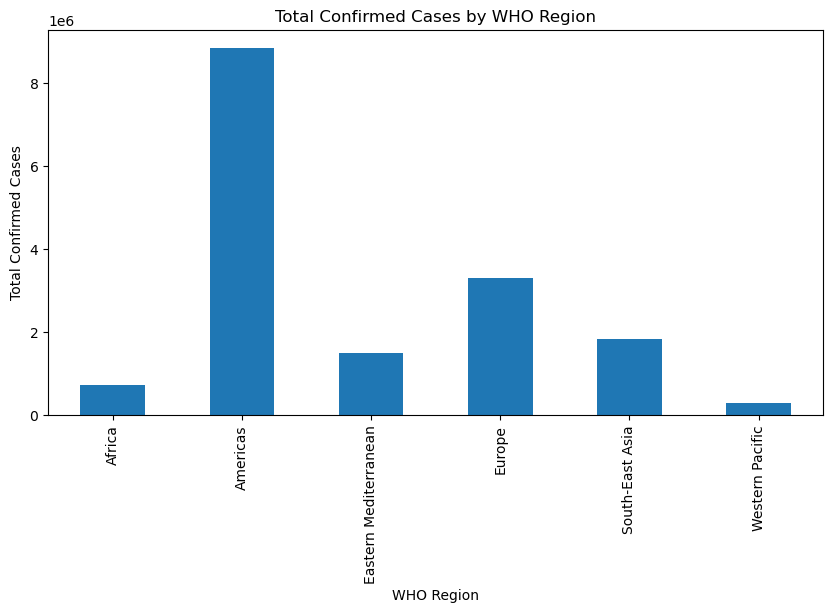

In [13]:
# Summary of cases by WHO Region
region_summary = data.groupby('WHO Region')[['Confirmed', 'Deaths', 'Recovered']].sum()
print(region_summary)

# Plot total confirmed cases by WHO Region
region_summary['Confirmed'].plot(kind='bar', figsize=(10,5), title="Total Confirmed Cases by WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("Total Confirmed Cases")
plt.show()


     Country/Region  Deaths / 100 Cases
184           Yemen               28.56
177  United Kingdom               15.19
16          Belgium               14.79
85            Italy               14.26
61           France               13.71
77          Hungary               13.40
120     Netherlands               11.53
111          Mexico               11.13
157           Spain               10.44
183  Western Sahara               10.00


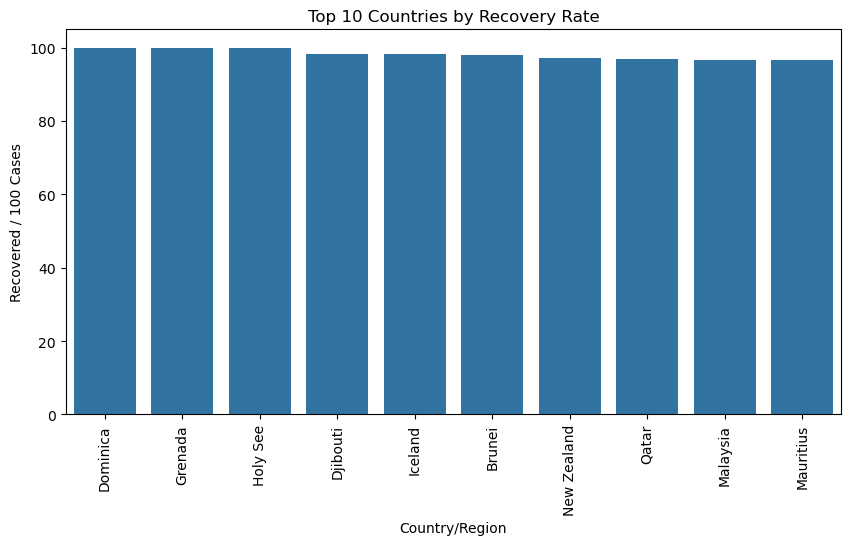

In [14]:
# Top 10 countries with highest death rate per 100 cases
top_death_rate = data.nlargest(10, 'Deaths / 100 Cases')[['Country/Region', 'Deaths / 100 Cases']]
print(top_death_rate)

# Plot recovery rates
plt.figure(figsize=(10, 5))
sns.barplot(x='Country/Region', y='Recovered / 100 Cases', data=data.nlargest(10, 'Recovered / 100 Cases'))
plt.title("Top 10 Countries by Recovery Rate")
plt.xticks(rotation=90)
plt.show()


       Country/Region  1 week % increase
130  Papua New Guinea             226.32
63             Gambia             191.07
11            Bahamas             119.54
186          Zimbabwe              57.85
99              Libya              42.78
58           Ethiopia              42.52
22           Botswana              41.57
97            Lesotho              40.67
160          Suriname              37.44
41         Costa Rica              37.34


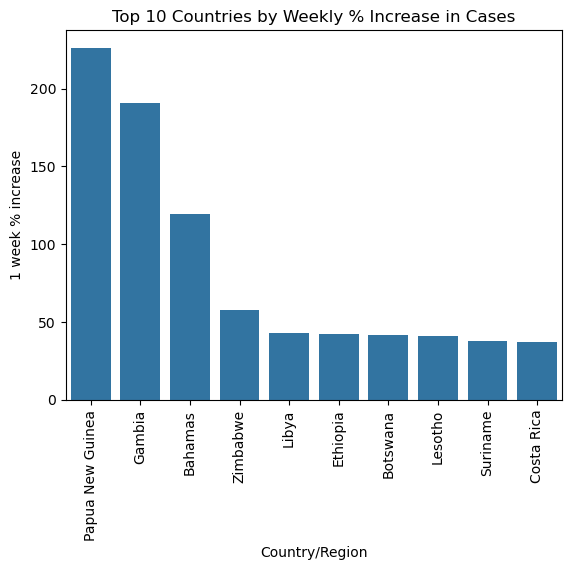

In [15]:
# Countries with highest 1 week % increase
top_week_increase = data.nlargest(10, '1 week % increase')[['Country/Region', '1 week % increase']]
print(top_week_increase)

# Plot
sns.barplot(x='Country/Region', y='1 week % increase', data=top_week_increase)
plt.xticks(rotation=90)
plt.title("Top 10 Countries by Weekly % Increase in Cases")
plt.show()


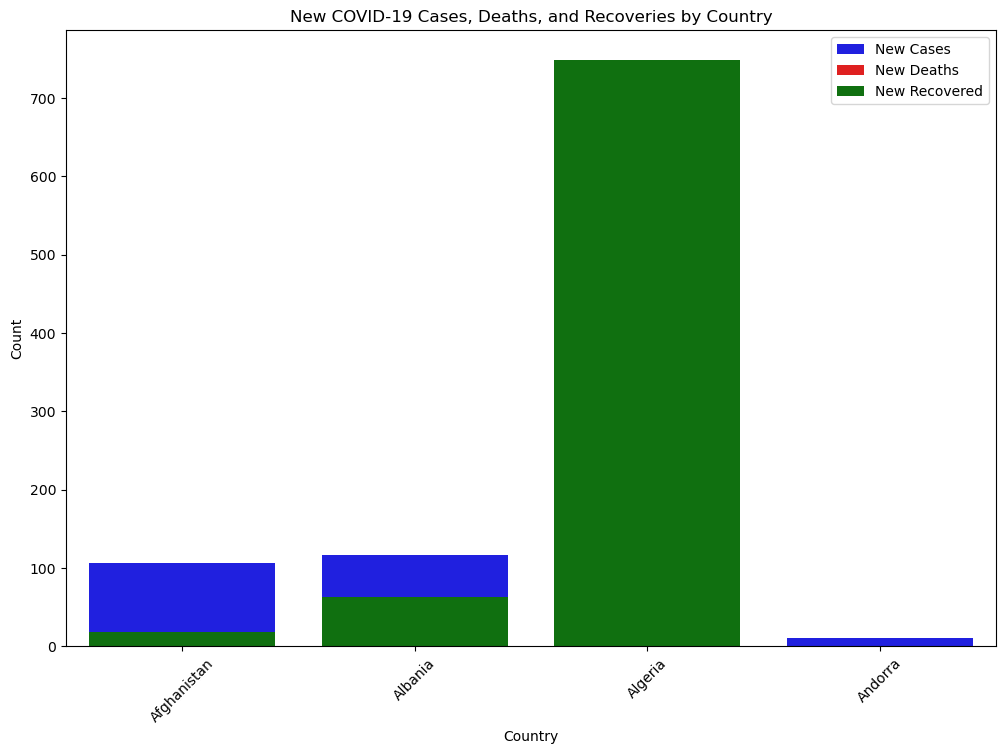

In [16]:
# New cases, deaths, and recoveries for a few sample countries
sample_countries = data[data['Country/Region'].isin(['Afghanistan', 'Albania', 'Algeria', 'Andorra'])]
plt.figure(figsize=(12, 8))

sns.barplot(x='Country/Region', y='New cases', data=sample_countries, color='blue', label='New Cases')
sns.barplot(x='Country/Region', y='New deaths', data=sample_countries, color='red', label='New Deaths')
sns.barplot(x='Country/Region', y='New recovered', data=sample_countries, color='green', label='New Recovered')

plt.legend()
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("New COVID-19 Cases, Deaths, and Recoveries by Country")
plt.xticks(rotation=45)
plt.show()


     Country/Region   Active
173              US  2816444
23           Brazil   508116
79            India   495499
177  United Kingdom   254427
138          Russia   201097
154    South Africa   170537
37         Colombia   117163
61           France   108928
32           Canada   107514
132            Peru    98752


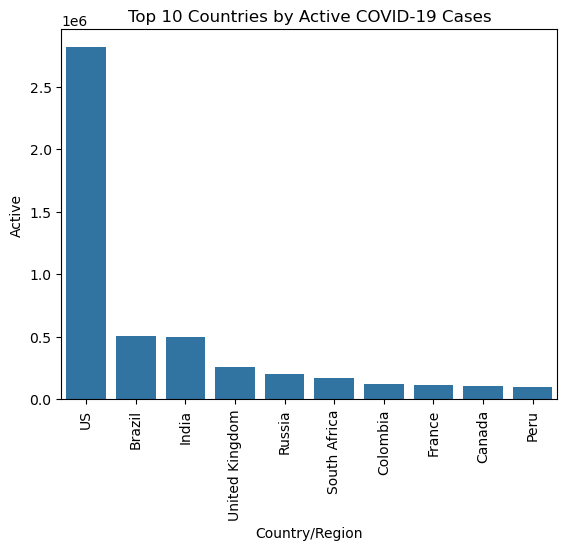

In [17]:
# Top 10 countries with most active cases
top_active_cases = data.nlargest(10, 'Active')[['Country/Region', 'Active']]
print(top_active_cases)

# Plot active cases
sns.barplot(x='Country/Region', y='Active', data=top_active_cases)
plt.xticks(rotation=90)
plt.title("Top 10 Countries by Active COVID-19 Cases")
plt.show()
